# Project:The Movie Database (TMDb) Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#sources">Sources</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we'll be analysing data associated with over 10 000 movies collected from TMDb including details of user rating as well as the revenue generated. In particular we'll be interested in finding trends within popular movies and the year of release as well as which movies generate the highest revenue, and subsequent profit. Furthermore, if there is any relationshp between profit and the rating of the movie.

Possible questions we might ask are:
1. Is the run time related to the popularity or vote average score?
2. Which year has been the most profitable?
3. Is there a relationship between budget and profit?
4. Are bigger budget movies more profitable?
5. Which decade made more money?
6. Which decade had the best movies?

In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Above are codes used to import the python libraries and packages used in this ananlyis. *Pandas* is a python package that is mostly used for data analysis as well as machine laerning. *Numpy* on the other hand is a python library which will allows us to work on arrays in our data. Lastly, *Matlib* is a data visualisation library which will help us plot graghs of our  findings.

<a id='wrangling'></a>
## Data Wrangling

### General Properties

With regards to data analysis, it's import to first look through the given data set and determine what kind of variables the data contains. From then on questions can be asked to determine insights. This includes number of rows and colunms and corresponding data types. We can also run preliminary histogram graph to see the relationship between the numeric data columns.

Below we determine the *shape* of the data which is 10 866 rows and 21 columns, then a table of descriptive statistics for the numeric columns such as mean, then a list of the columns and their corresponding information like non-null values and data types.

We also determined that the data has been collected from 1962 all through to 2014.

In [310]:
movies = pd.read_csv('tmdb-movies.csv')
movies.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [311]:
movies.shape

(10866, 21)

In [312]:
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [313]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

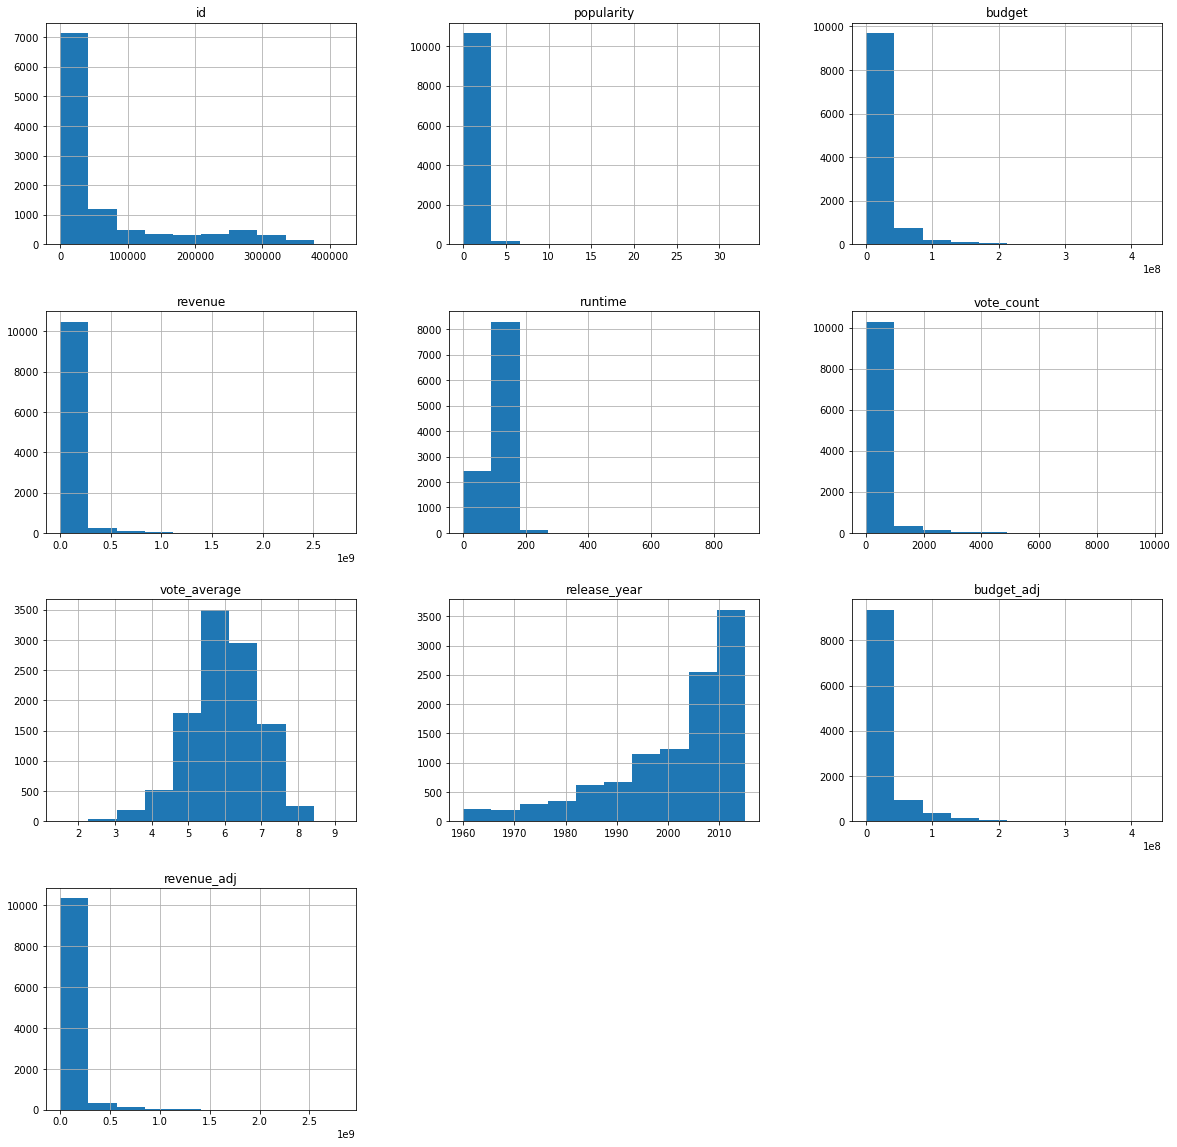

In [314]:
movies.hist(figsize=(20,20));

<AxesSubplot:>

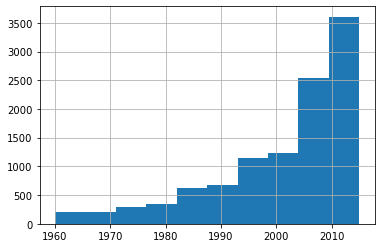

In [315]:
movies["release_year"].value_counts()
movies["release_year"].hist()

### Data Cleaning

Our firts step in data cleaning is to drop columns that we will not be using in the analysis. To drop means to remove the specified column. This will make working with data much easier.

The second step is to determine any duplicate entires in the data set. Duplicate entires can skew data analysis and give incorrect insights. Once the duplicte entries are found, they are also removed.

Our next steps are to build any new related columns and  format our data to ease analysis.
1. *profit_mill* is created to calculate the profit made per movies in millions (*revenue less budget*), to see how successful it really was.
2. *time_length* is created is categorise the *runtime* of each movie into manageable descriptions.

With regards to runtime, many entries (a significant amount) had zero as their runtime which is not possible. To mitigate this and to not lose data points, the zero values were then replaced with the column mean (average).

**After all this, we are now ready to analyse our newly clean data.**

In [316]:
movies.drop(['imdb_id','director', 'production_companies','budget_adj','revenue_adj','genres','cast','homepage','tagline','keywords','overview','release_date','vote_count'], axis = 1, inplace = True)

In [317]:
#remove dupilcates
sum(movies.duplicated())
#remove duplicate
movies = movies.drop_duplicates()
movies.shape

(10865, 8)

In [318]:
movies["profit_mill"]=(movies["revenue"]-movies["budget"])/1000000
movies["profit_mill"]

0        1363.528810
1         228.436354
2         185.238201
3        1868.178225
4        1316.249360
            ...     
10861       0.000000
10862       0.000000
10863       0.000000
10864       0.000000
10865      -0.019000
Name: profit_mill, Length: 10865, dtype: float64

In [319]:
##creating runtime categorical variable

movies["runtime"].describe()

#replace 0 with mean
movies.loc[movies["runtime"] ==0]
movies["runtime"]=movies["runtime"].replace(0,movies["runtime"].mean())

movies["runtime"].describe()
#min = 2, 25% 90 50% 99 %75 111 max 900
movies["time_length"] = pd.cut(movies.runtime,bins=[0,90,111,900],labels=["Short Film","Average Film","Long Film"])

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Are big budget movies more profitable? Are higher rated movies more profitable?

In [320]:
movies["budget_mill"] = movies["budget"]/1000000

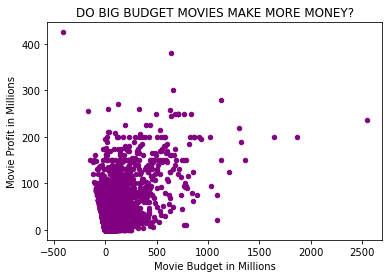

In [321]:
movies.plot(y="budget_mill", x= "profit_mill", kind = "scatter", color="purple")
plt.title("DO BIG BUDGET MOVIES MAKE MORE MONEY?")
plt.xlabel("Movie Budget in Millions")
plt.ylabel("Movie Profit in Millions");

Text(0, 0.5, 'Profit Made in Millions')

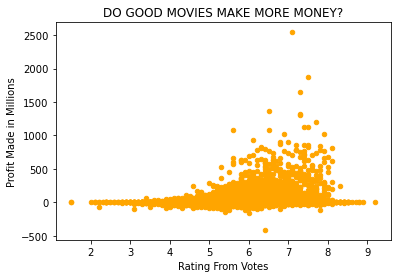

In [322]:
movies.plot(x="vote_average", y= "profit_mill", kind = "scatter", color="orange")
plt.title("DO GOOD MOVIES MAKE MORE MONEY?")
plt.xlabel("Rating From Votes")
plt.ylabel("Profit Made in Millions")

### Research Question 2: Which decade made the best movies?

In [323]:
movies["decade"] = pd.cut(movies.release_year,bins=[1960,1970,1980,1990,2000,2010,2020],labels=["60s","70s","80s","90s","00s","10s"])
movies["decade"].value_counts()

00s    3824
10s    3116
90s    1860
80s    1117
70s     545
60s     371
Name: decade, dtype: int64

In [324]:
pref_decade = (movies.groupby("decade").popularity.mean())*10
vote_decade = (movies.groupby("decade").vote_average.mean())

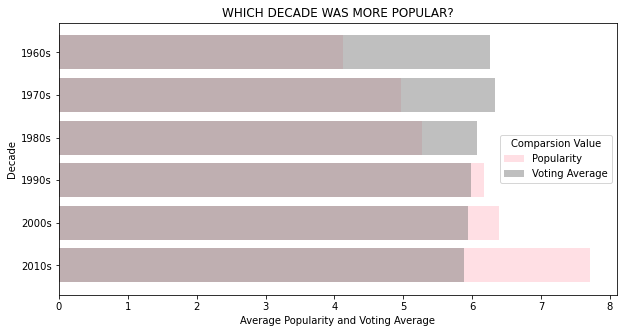

In [325]:
locations5 = [6,5,4,3,2,1]

labels = ["1960s", "1970s", "1980s", "1990s", "2000s", "2010s"]
plt.rcParams["figure.figsize"] = (10,5)
plt.barh( locations5, pref_decade, tick_label=labels, alpha = 0.5, color = "pink")
plt.barh( locations5, vote_decade, tick_label=labels, alpha = 0.5, color = "grey")
plt.title("WHICH DECADE WAS MORE POPULAR?")
plt.ylabel("Decade")
plt.xlabel("Average Popularity and Voting Average")
plt.legend(["Popularity","Voting Average"], title="Comparsion Value", loc="center right")

### Research Question 3: Do viewers prefer longer movies? Is it more profitable to make shorter movies? Determining the effect of runtime on preference and profit.

In [326]:
movies["time_length"].value_counts()

Average Film    5224
Short Film      2931
Long Film       2710
Name: time_length, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Short Film'),
  Text(1, 0, 'Average Film'),
  Text(2, 0, 'Long Film')])

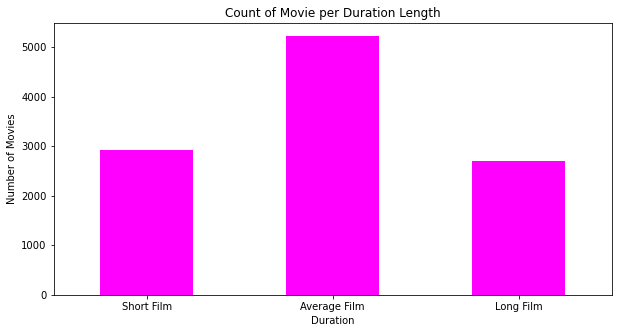

In [327]:
movies["time_length"].value_counts(sort=False).plot(kind="bar", color="magenta")
plt.title("Count of Movie per Duration Length")
plt.ylabel("Number of Movies")
plt.xlabel("Duration")
plt.xticks(rotation=0)

In [328]:
preference = movies.groupby("time_length").vote_average.mean()
preference

time_length
Short Film      5.759877
Average Film    5.876761
Long Film       6.397085
Name: vote_average, dtype: float64

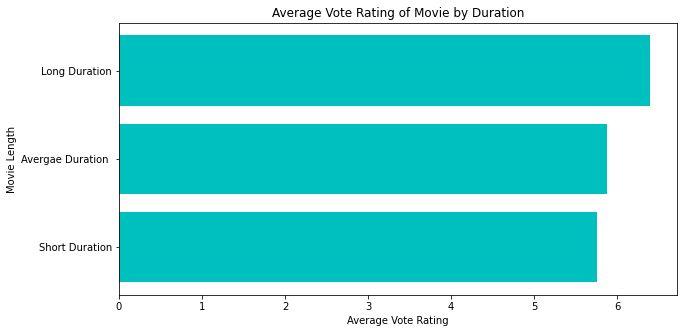

In [329]:
locations = [1,2,3]
heights = preference

labels = ["Short Duration", "Avergae Duration ", "Long Duration"]
plt.barh(locations, heights, tick_label=labels, color = "c")
plt.title("Average Vote Rating of Movie by Duration")
plt.ylabel("Movie Length")
plt.xlabel("Average Vote Rating");

In [330]:
pro = movies.groupby("time_length").profit_mill.mean()
pro

time_length
Short Film       7.679407
Average Film    18.459558
Long Film       57.153241
Name: profit_mill, dtype: float64

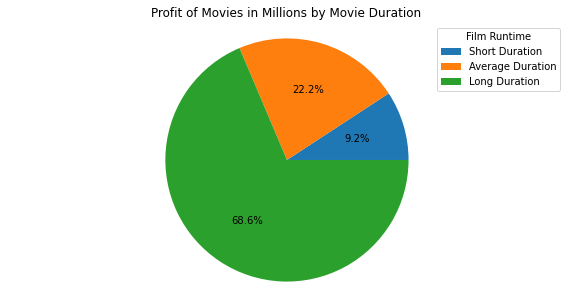

In [331]:
plt.pie(pro,autopct='%1.1f%%')
plt.title("Profit of Movies in Millions by Movie Duration")
plt.axis('equal')
plt.legend(["Short Duration","Average Duration","Long Duration"], title="Film Runtime");

<a id='conclusions'></a>
## Conclusions

1. _**Profit:**_ From the analysis, it is clear that the budget of a movie does not determine its profitable, as there is no relationship in the scatter graph. Further more, profit and the rating (vote_average), do not have any relationship. This means that really good movies do not necessarily produce more profit. 

2. _**Decade:**_ Using average popularity as a measure, it seems the 2010s and the 2000s have the most popular movies. This could mean that these decades produced the better movies. However, if vote_average is used instead, the opposite is likely to be true, as the 1960s and 1970s have higher votes. The limitation now is which of these variables is true measure of enjoyment and quality, or if those are different descriptors to begin  with.

3. _**Runtime:**_ From the analysis above it seems like although preference is only slightly higher for longer duration movies (duration of 111 minutes and higher), the movies on average tend to produce more profit. This could possible be because most long form movies are based off of book series or trilogies, and the audiences are committed to watching them, and maybe watching them multiple times. This is also interesting because the majority of the movies were of average duration but were substantially less profitable (almost 3 times). Unfortunately data on frequency of viewing was not given so that causation cannot be confirmed. 

<a id='sources'></a>
## Sources

https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/#fine-tuning-your-plot-legend-position-and-hiding

https://pandas.pydata.org/docs/

https://pythonguides.com/category/python-tutorials/python-pandas/

https://www.mathworks.com/help/matlab/creating_plots/specify-plot-colors.html#mw_fd74824f-3b08-4bfe-a526-008b68ccb92c